In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#read data
accident = pd.read_csv('UK_Traffic_Accidents_2015.csv', low_memory=False)

In [3]:
accident.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [4]:
#select columnn assigned for EDA
loc_data = pd.read_csv('UK_Traffic_Accidents_2015.csv', low_memory=False, usecols=["Accident_Index", "Location_Easting_OSGR","Location_Northing_OSGR"])

In [5]:
loc_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR
0,201501BS70001,525130.0,180050.0
1,201501BS70002,526530.0,178560.0
2,201501BS70004,524610.0,181080.0
3,201501BS70005,524420.0,181080.0
4,201501BS70008,524630.0,179040.0


In [6]:
#check the info of the loc_data
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Accident_Index          140056 non-null  object 
 1   Location_Easting_OSGR   140029 non-null  float64
 2   Location_Northing_OSGR  140029 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


In [7]:
loc_data.Accident_Index.describe()

count            140056
unique           140056
top       201501BS70001
freq                  1
Name: Accident_Index, dtype: object

The Accident_Index is a string with unique values, therefore, there isn't much EDA plots that can be done with it.

In [8]:
#check for null values
print(loc_data.Location_Easting_OSGR.isna().sum())
print(loc_data.Location_Northing_OSGR.isna().sum())
print(loc_data.Accident_Index.isna().sum())

27
27
0


In [9]:
#drop all null values
loc_data.dropna(inplace=True)

In [10]:
#test for null values
print(loc_data.Location_Easting_OSGR.isna().sum())
print(loc_data.Location_Northing_OSGR.isna().sum())
print(loc_data.Accident_Index.isna().sum())

0
0
0


In [11]:
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140029 entries, 0 to 140055
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Accident_Index          140029 non-null  object 
 1   Location_Easting_OSGR   140029 non-null  float64
 2   Location_Northing_OSGR  140029 non-null  float64
dtypes: float64(2), object(1)
memory usage: 4.3+ MB


## Questions
- What is the relationship between the Eastings and Northings OSGR?
- Is there any correlation between the Eastings and Northings? If yes, what is the nature of the correlation?

In [12]:
loc_data['Location_Easting_OSGR'].describe()

count    140029.000000
mean     446913.896086
std       94893.264196
min       70860.000000
25%      385626.000000
50%      451460.000000
75%      526760.000000
max      655282.000000
Name: Location_Easting_OSGR, dtype: float64

C:\Users\CC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


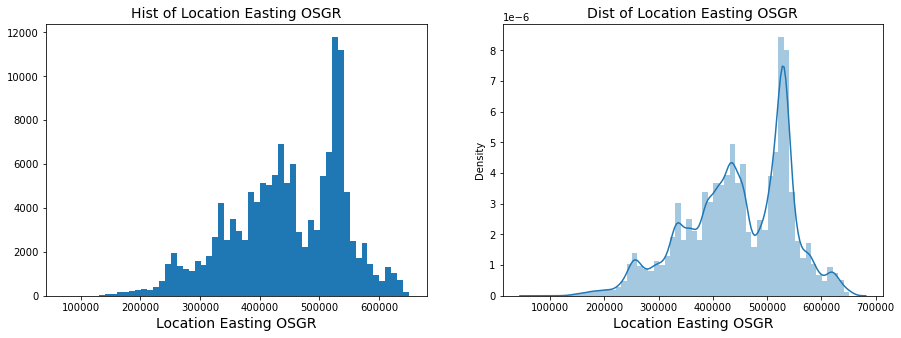

In [13]:
#plt a distplot and histogram of Location Easting
bins= np.arange(loc_data['Location_Easting_OSGR'].min(), loc_data['Location_Easting_OSGR'].max(), 10000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=loc_data, x='Location_Easting_OSGR', bins=bins);
plt.xlabel('Location Easting OSGR', fontsize=14);
plt.title('Hist of Location Easting OSGR', fontsize=14);

plt.subplot(1,2,2)
sb.distplot(x=loc_data['Location_Easting_OSGR'], bins=bins);
plt.xlabel('Location Easting OSGR', fontsize=14);
plt.title('Dist of Location Easting OSGR', fontsize=14);

The distribution of the Easting location is Left-skewed, with multi-spikes

In [14]:
loc_data['Location_Northing_OSGR'].describe()

count    1.400290e+05
mean     2.899043e+05
std      1.577932e+05
min      1.062800e+04
25%      1.766380e+05
50%      2.408860e+05
75%      3.911840e+05
max      1.197917e+06
Name: Location_Northing_OSGR, dtype: float64

C:\Users\CC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


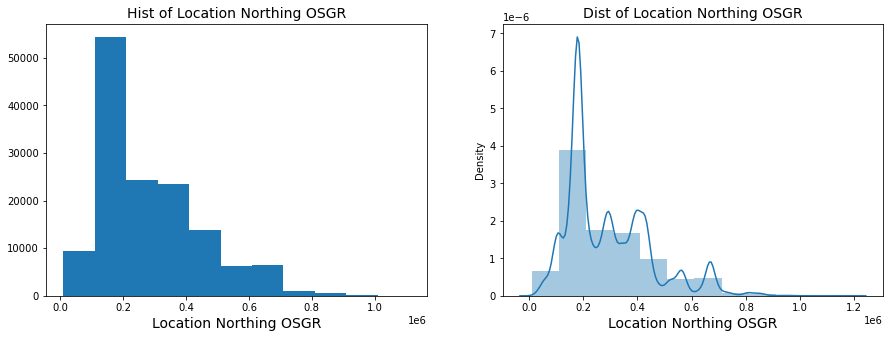

In [15]:
#plt a distplot and histogram of Location Easting
bins= np.arange(1e4, loc_data['Location_Northing_OSGR'].max(), 1e5)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=loc_data, x='Location_Northing_OSGR', bins=bins);
plt.xlabel('Location Northing OSGR', fontsize=14);
plt.title('Hist of Location Northing OSGR', fontsize=14);

plt.subplot(1,2,2)
sb.distplot(x=loc_data['Location_Northing_OSGR'], bins=bins);
plt.xlabel('Location Northing OSGR', fontsize=14);
plt.title('Dist of Location Northing OSGR', fontsize=14);

While the distribution of the Northings is right skewed and unimodal.
From this, I can deduce that the relationship between these columns will be negative

### FINDINGS
From the Univariate plots, it can be observed that both columns are skewed differently.
This means that
- They are not a function of each other
- They are not correlative or are correlated negatively.

More findings...

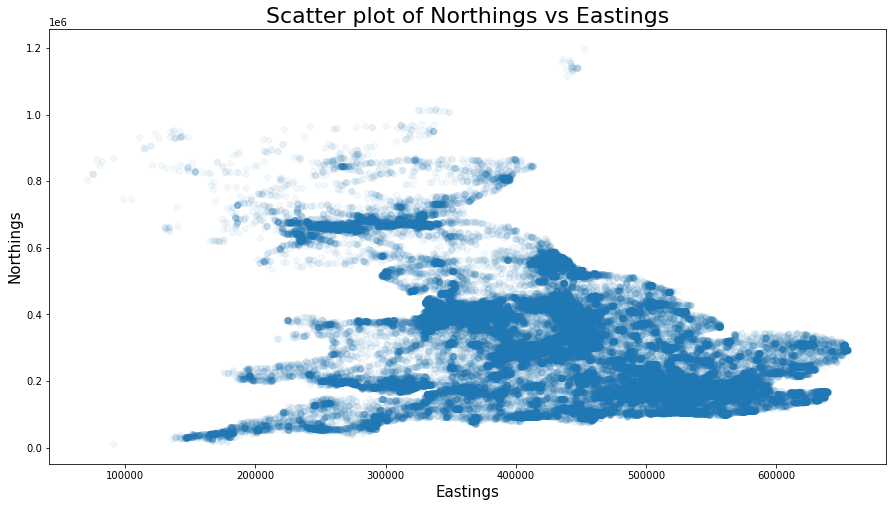

In [16]:
#plot a scatter plot to get their relationship
plt.figure(figsize=(15,8))
plt.scatter(data=loc_data,x='Location_Easting_OSGR', y='Location_Northing_OSGR', alpha=1/20);
plt.title('Scatter plot of Northings vs Eastings', fontsize=22);
plt.xlabel('Eastings', fontsize=15);
plt.ylabel('Northings', fontsize=15);

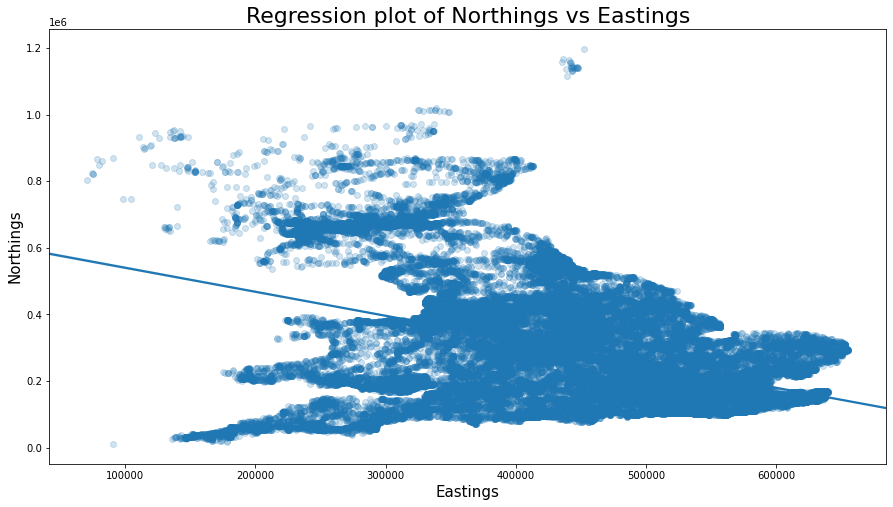

In [17]:
#plot a regplot to get their relationship
plt.figure(figsize=(15,8))
sb.regplot(data=loc_data,x='Location_Easting_OSGR', y='Location_Northing_OSGR', scatter_kws={'alpha':1/5},
          truncate=False, x_jitter=2.5);
plt.title('Regression plot of Northings vs Eastings', fontsize=22);
plt.xlabel('Eastings', fontsize=15);
plt.ylabel('Northings', fontsize=15);

The line shows that there is a negative relationship between the Eastings and Northings

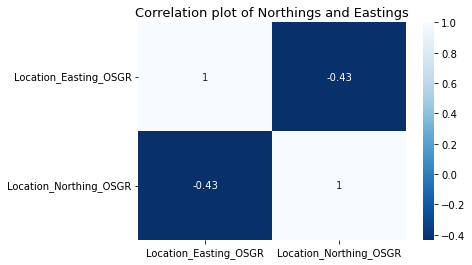

In [18]:
#Let's look at the correlation 
corr=loc_data.corr()
sb.heatmap(data=corr, annot=True, cmap='Blues_r');
plt.title('Correlation plot of Northings and Eastings', fontsize=13);

The correlation heatmap confirms the suspicion that there is a negatinve correlation between the Easting and Northings

### FINDINGS
As earlier suspected, the relationship between both columns is highly unsymmetrical.
This is expected as they both indicate location points via longitude and latitude

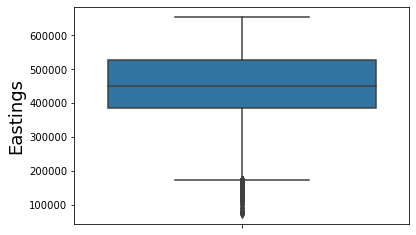

In [19]:
#Check the boxplot
sb.boxplot(data=loc_data, y='Location_Easting_OSGR');
plt.ylabel('Eastings',fontsize=18);

The boxplot depicts that the easting is purely negative as the outliers is visibly pointing towards the negative direction

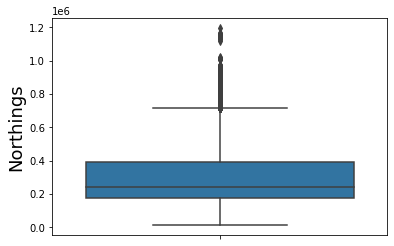

In [20]:
#check the boxplot
sb.boxplot(data=loc_data, y='Location_Northing_OSGR');
plt.ylabel('Northings',fontsize=18);

The boxplot depicts that the northings is purely positive as the outliers is visibly pointing towards the positive direction

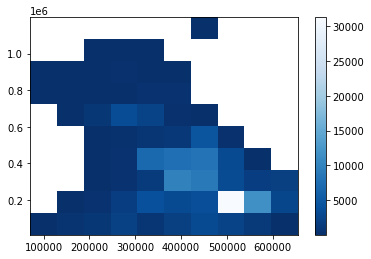

In [21]:
#plot a heatmap between both Eastings and Northings
plt.hist2d(data=loc_data, x='Location_Easting_OSGR', y='Location_Northing_OSGR', cmap='Blues_r',cmin=0.5);
plt.colorbar();

In [22]:
loc_data.Location_Easting_OSGR.nunique()

89880

In [23]:
loc_data.Location_Northing_OSGR.nunique()

93322

# CONCLUSION
- Accidents in the UK in Eastings are independent of the Northings
- Further investigation with geo-cordinates will pinpoint further indications about accidents frequencies
- Further look at their unique float values further proves that they are invariably linked.